<a href="https://colab.research.google.com/github/DaegyuHwang/Deep-Learning/blob/main/XAI%2C_Explainable_AI_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### CAM, Gradient CAM, Occlusion Sensitivity

In [ ]:
!pip install tf-explain

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.3 MB/s eta 0:00:00


Cloning into 'data'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 36 (delta 9), reused 26 (delta 4), pack-reused 0 (from 0)
Receiving objects: 100% (36/36), 483.12 KiB | 3.80 MiB/s, done.
Resolving deltas: 100% (9/9), done.


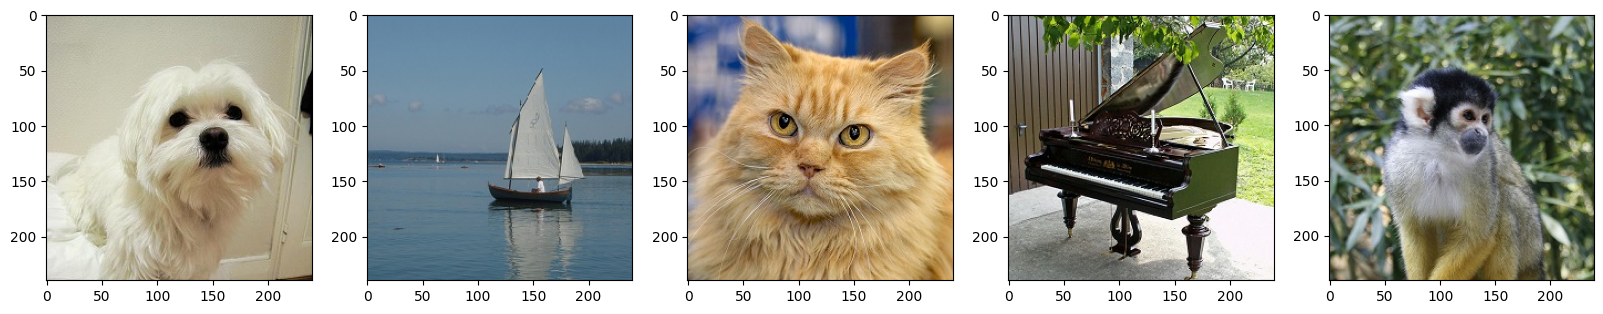

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16

# import XAI algorithm
from tf_explain.core.grad_cam import GradCAM
from tf_explain.core.occlusion_sensitivity import OcclusionSensitivity

import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# call the data
!git clone https://github.com/taehojo/data.git

# list for the original images
images_originals = []

# put the original image imto the list
for img_path in glob.glob('./data/img/*_0.jpg'):
    images_originals.append(mpimg.imread(img_path))

# the size of the image showing up in colab
plt.figure(figsize=(20,20))

# show the original image in colab
for i, image_o in enumerate(images_originals):
    plt.subplot(5, 5, i + 1)
    plt.imshow(image_o)

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor']]
Received: inputs=['Tensor(shape=(1, 224, 224, 3))']
  warnings.warn(msg)


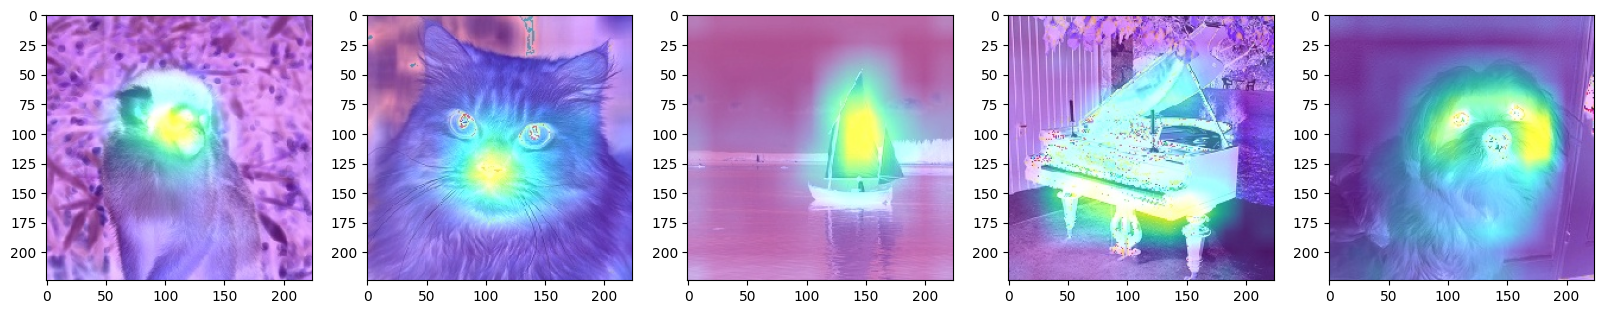

In [ ]:
# call the trained model
model = VGG16(weights="imagenet", include_top=True)

# the original image name and the name of image in Imagenet
input_list = ["maltese", "persian_cat", "squirrel_monkey", "grand_piano", "yawl"]
imagenet_index = ["153", "283", "382", "579", "914"]

# using Gradient CAM
explainer = GradCAM()

images_cams = []

## Gradient CAM algorithm
for l, i in zip(input_list, imagenet_index):
    img = load_img('./data/img/{}_0.jpg'.format(l), target_size=(224, 224)) # size setting
    img = img_to_array(img)
    data = ([img], None)
    grid = explainer.explain(data, model, int(i), layer_name="block5_conv3")
    explainer.save(grid, ".", './data/img/{}_cam.jpg'.format(l))  # the name that will be saved

# call the images that the gradient CAM is applied
plt.figure(figsize=(20,20))

for img_path in glob.glob('./data/img/*_cam.jpg'):
    images_cams.append(mpimg.imread(img_path))

for i, image_c in enumerate(images_cams):
    plt.subplot(5, 5, i + 1)
    plt.imshow(image_c)

2/2 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step


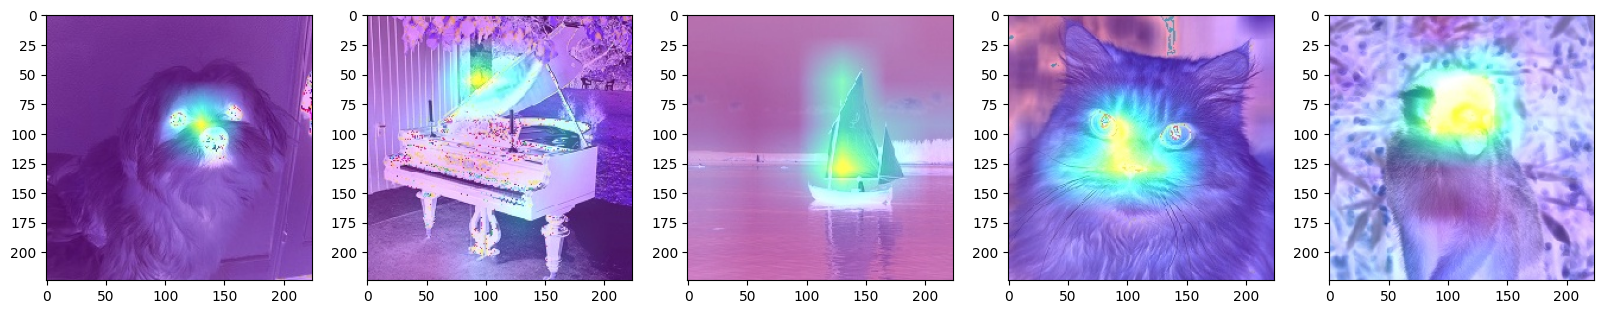

In [ ]:
## using Occlusion Sensitivity
explainer = OcclusionSensitivity()
images_occ1s = []
patch_size = 40

# occlusion sensitivity algorithm
for l, i in zip(input_list, imagenet_index):
    img = load_img('./data/img/{}_0.jpg'.format(l), target_size=(224, 224))
    img = img_to_array(img)
    data = ([img], None)
    grid = explainer.explain(data, model, int(i), patch_size)
    explainer.save(grid, ".", './data/img/{}_occ1.jpg'.format(l))

# call the images that the algorithm applied
plt.figure(figsize=(20,20))

for img_path in glob.glob('./data/img/*_occ1.jpg'):
    images_occ1s.append(mpimg.imread(img_path))

for i, image in enumerate(images_occ1s):
    plt.subplot(5, 5, i + 1)
    plt.imshow(image)

In [ ]:
patch_size = 20

images_occ2s = []

for l, i in zip(input_list, imagenet_index):
    img = load_img('./data/img/{}_0.jpg'.format(l), target_size=(224, 224))
    img = img_to_array(img)
    data = ([img], None)
    grid = explainer.explain(data, model, int(i), patch_size)
    explainer.save(grid, ".", './data/img/{}_occ2.jpg'.format(l))

for img_path in glob.glob('./data/img/*_occ2.jpg'):
    images_occ2s.append(mpimg.imread(img_path))

plt.figure(figsize=(20,20))
for i, image in enumerate(images_occ2s):
    plt.subplot(5, 5, i + 1)
    plt.imshow(image)

5/5 ━━━━━━━━━━━━━━━━━━━━ 90s 17s/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 85s 17s/step
2/5 ━━━━━━━━━━━━━━━━━━━━ 59s 20s/step 

In [ ]:
# see the all images

plt.figure(figsize=(20,20))

images = []
for img_path in glob.glob('./data/img/*.jpg'):
    images.append(mpimg.imread(img_path))

for i, image in enumerate(images):
    plt.subplot(5, 4, i + 1)
    plt.imshow(image)